# Fully Convolutional Neutral Networks


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, GlobalAveragePooling1D, Dense


In [3]:
# loading dataset
file_path='C:/Users/dugga/OneDrive/Desktop/ML1/ML/data/AAPL.csv'
data=pd.read_csv(file_path)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [5]:
close_prices= data['Close'].values

In [6]:
#Normalization:
scaler= MinMaxScaler(feature_range=(0,1))
closed_prices_scaled= scaler.fit_transform(close_prices.reshape(-1,1))

In [7]:
#Create sequences
def create_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data) - seq_length):
     X.append(data[i:i+seq_length])
     y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(closed_prices_scaled, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for Conv1D
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [9]:
X_train_reshaped


array([[[0.00043548],
        [0.00039868],
        [0.00034961],
        ...,
        [0.00035881],
        [0.00030975],
        [0.00028214]],

       [[0.00039868],
        [0.00034961],
        [0.00036495],
        ...,
        [0.00030975],
        [0.00028214],
        [0.00026068]],

       [[0.00034961],
        [0.00036495],
        [0.00038335],
        ...,
        [0.00028214],
        [0.00026068],
        [0.00028214]],

       ...,

       [[0.09453661],
        [0.09546302],
        [0.0941264 ],
        ...,
        [0.11040933],
        [0.10966152],
        [0.10856827]],

       [[0.09546302],
        [0.0941264 ],
        [0.09523534],
        ...,
        [0.10966152],
        [0.10856827],
        [0.10984405]],

       [[0.0941264 ],
        [0.09523534],
        [0.09583398],
        ...,
        [0.10856827],
        [0.10984405],
        [0.10829544]]])

In [20]:
# Define the FCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(1))

C:\Users\dugga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 59, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 58, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,513 (33.25 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# training the model
history= model.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.3846e-05 - val_loss: 1.6681e-04
Epoch 2/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7512e-06 - val_loss: 2.0993e-04
Epoch 3/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9249e-06 - val_loss: 1.7265e-04
Epoch 4/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2463e-06 - val_loss: 1.9218e-04
Epoch 5/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4524e-06 - val_loss: 1.5091e-04
Epoch 6/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8096e-06 - val_loss: 1.7440e-04
Epoch 7/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0811e-06 - val_loss: 1.7122e-04
Epoch 8/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5722e-06 - val_loss: 1.2564e-04
Epoch 9/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3119e-06 - val_loss: 2.7228e-04
Epoch 10/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6604e-06 - val_loss: 2.1388e-04
Epoch 11/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss

In [28]:
# evaluation of model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016    
Test Loss: 0.00677875941619277
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


RMSE: 14.98142528998443
MAE: 10.744820822089242
MAPE: 15.851730190528327


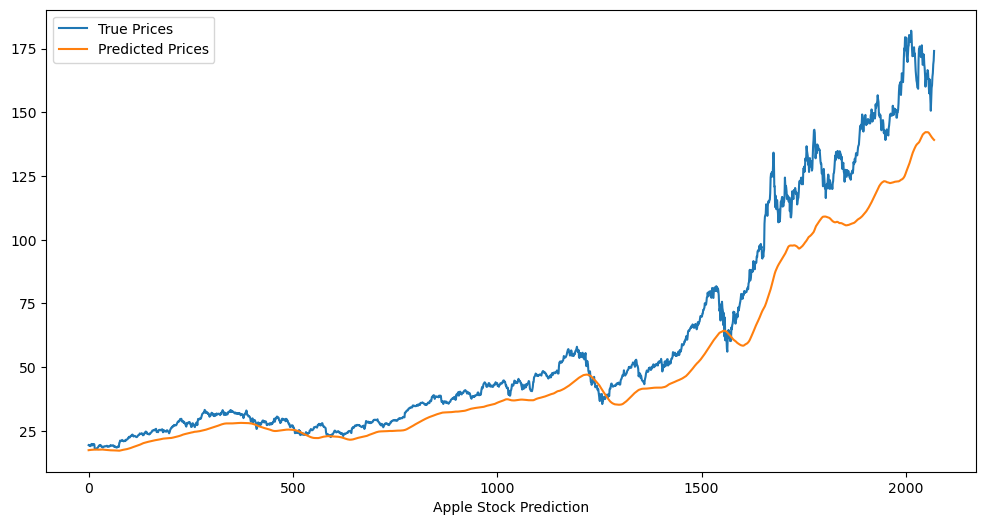

In [32]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the predictions against the true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.xlabel('Apple Stock Prediction')
plt.legend()
plt.show()